In [1]:
#imports
from sympy import *
import pandas as pd
import numpy as np
from text_unidecode import unidecode
import locale
from re import sub
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  
from sklearn.linear_model import Lasso  
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

## First Task
- Exploring data set
- Finding missing values
- Finding outliers and determining what to do with them

In [2]:
# 1. Loading the data and renaming columns
exoplanet_df = pd.read_csv('exoplanet_dataset.csv')

print(exoplanet_df.shape, "- 9564 rows with 49 features")

pd.set_option('display.max_columns', None)

(9564, 49) - 9564 rows with 49 features


In [3]:

exoplanet_df = exoplanet_df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod, days',
'koi_period_err1':'OrbitalPeriodUpperUnc, days',
'koi_period_err2':'OrbitalPeriodLowerUnc, days',
'koi_time0bk':'TransitEpoch, BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration, hrs',
'koi_duration_err1':'TransitDurationUpperUnc, hrs',
'koi_duration_err2':'TransitDurationLowerUnc, hrs',
'koi_depth':'TransitDepth, ppm',
'koi_insol':'InsolationFlux, Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
'koi_model_snr':'TransitSignal-to-Noise',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature, K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
'koi_depth_err1':'TransitDepthUpperUnc, ppm',
'koi_depth_err2':'TransitDepthLowerUnc, ppm',
'koi_prad':'PlanetaryRadius, Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
'koi_teq':'EquilibriumTemperature, K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
'koi_srad':'StellarRadius, Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
'ra':'RA, decimaldegrees',
'dec':'Dec, decimaldegrees',
'koi_kepmag':'Kepler-band, mag'
})

In [4]:
exoplanet_df.head(35)

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.1460,0.3180,-0.1460,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.5860,0.0590,-0.4430,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.9690,5.1260,-0.0770,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.2760,0.1150,-0.0920,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.7010,0.2350,-0.4780,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,-0.001410,0.5380,0.0300,-0.4280,4.59450,0.06100,-0.06100,1517.5,24.2,-24.2,3.90,1.27,-0.42,835.0,NaN,NaN,114.81,112.85,-36.70,66.5,1.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,1.046000e-05,-1.046000e-05,172.979370,0.001900,-0.001900,0.7620,0.1390,-0.5320,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160.0,NaN,NaN,427.65,420.33,-136.70,40.2,2.0,q1_q17_dr25_tce,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,1.781000e-05,-1.781000e-05,179.

In [5]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


/home/mishku_vertebrate/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mishku_vertebrate/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mishku_vertebrate/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


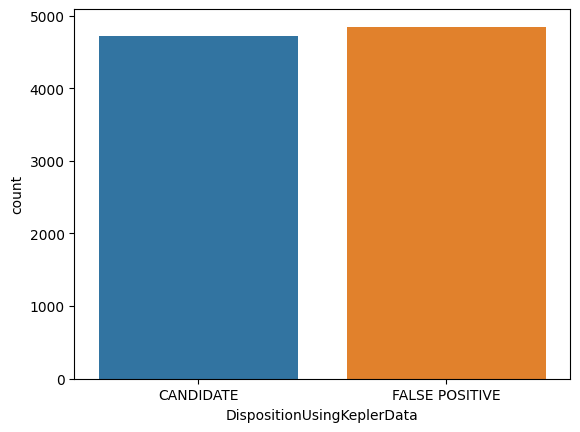

In [6]:
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

/home/mishku_vertebrate/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mishku_vertebrate/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mishku_vertebrate/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='ExoplanetArchiveDisposition', ylabel='count'>

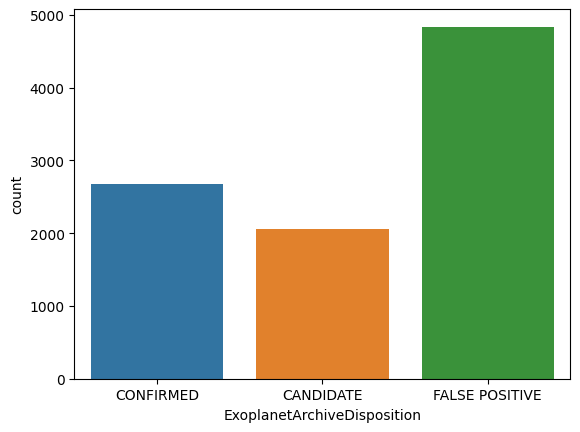

In [7]:
sns.countplot(x = exoplanet_df['ExoplanetArchiveDisposition'])

In [8]:
# showing no of missing values for each column
missing_values = exoplanet_df.isnull().sum()
missing_values

KepID                                                       0
KOIName                                                     0
KeplerName                                               6891
ExoplanetArchiveDisposition                                 0
DispositionUsingKeplerData                                  0
DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod, days                                         0
OrbitalPeriodUpperUnc, days                               454
OrbitalPeriodLowerUnc, days                               454
TransitEpoch, BKJD                                          0
TransitEpochUpperUnc, BKJD                                454
TransitEpochLowerUnc, BKJD                                454
ImpactPa

In [9]:
# finding percentages of missing values for each column
total_rows = len(exoplanet_df)
missing_percentages = (missing_values / total_rows) * 100
missing_percentages.sort_values(ascending=False)

EquilibriumTemperatureUpperUnc, K                        100.000000
EquilibriumTemperatureLowerUnc, K                        100.000000
KeplerName                                                72.051443
DispositionScore                                          15.788373
StellarEffectiveTemperatureLowerUnc, K                     5.050188
StellarRadiusUpperUnc, Solarradii                          4.893350
StellarEffectiveTemperatureUpperUnc, K                     4.893350
StellarSurfaceGravityLowerUnc, log10(cm/s^2)               4.893350
StellarSurfaceGravityUpperUnc, log10(cm/s^2)               4.893350
StellarRadiusLowerUnc, Solarradii                          4.893350
TransitEpochUpperUnc, BKJD                                 4.746968
OrbitalPeriodUpperUnc, days                                4.746968
OrbitalPeriodLowerUnc, days                                4.746968
TransitEpochLowerUnc, BKJD                                 4.746968
ImpactParameterUpperUnc                         

In [10]:
def identify_outliers(feature_series):
    Q1 = feature_series.quantile(0.25)
    Q3 = feature_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (feature_series < lower_bound) | (feature_series > upper_bound)
    return outliers.sum()

In [11]:
# extracting outliers in a map
outliers_dict = {}
for column in exoplanet_df.select_dtypes(include=np.number).columns:
    outliers_count = identify_outliers(exoplanet_df[column])
    outliers_dict[column] = outliers_count
outliers_dict

{'KepID': 0,
 'DispositionScore': 0,
 'NotTransit-LikeFalsePositiveFlag': 1531,
 'koi_fpflag_ss': 2226,
 'CentroidOffsetFalsePositiveFlag': 1889,
 'EphemerisMatchIndicatesContaminationFalsePositiveFlag': 1148,
 'OrbitalPeriod, days': 1567,
 'OrbitalPeriodUpperUnc, days': 1650,
 'OrbitalPeriodLowerUnc, days': 1650,
 'TransitEpoch, BKJD': 1046,
 'TransitEpochUpperUnc, BKJD': 838,
 'TransitEpochLowerUnc, BKJD': 838,
 'ImpactParamete': 82,
 'ImpactParameterUpperUnc': 736,
 'ImpactParameterLowerUnc': 120,
 'TransitDuration, hrs': 869,
 'TransitDurationUpperUnc, hrs': 930,
 'TransitDurationLowerUnc, hrs': 930,
 'TransitDepth, ppm': 1798,
 'TransitDepthUpperUnc, ppm': 1084,
 'TransitDepthLowerUnc, ppm': 1084,
 'PlanetaryRadius, Earthradii': 1469,
 'PlanetaryRadiusUpperUnc, Earthradii': 1716,
 'PlanetaryRadiusLowerUnc, Earthradii': 1390,
 'EquilibriumTemperature, K': 411,
 'EquilibriumTemperatureUpperUnc, K': 0,
 'EquilibriumTemperatureLowerUnc, K': 0,
 'InsolationFlux, Earthflux': 1438,
 'Ins

### Our choice was to keep outliers in case they represent useful values in the data or anomalies that may prove to be useful in predictions

# 2. Feature engineering
- Removing columns with 100% missing values
- Removing irrelevant columns
- Imputing missing data using knn to predict values

In [12]:
# Removing the two columns that have missing values EquilibriumTemperatureUpperUnc, K  and EquilibriumTemperatureLowerUnc, K  plus irrelevant columns
exoplanet_df=exoplanet_df.drop(columns=['EquilibriumTemperatureUpperUnc, K','EquilibriumTemperatureLowerUnc, K','KepID','KOIName','KeplerName','TCEDeliver'])

In [13]:
# Correlation matrix 
temp_df = exoplanet_df.drop(columns=['DispositionUsingKeplerData', 'ExoplanetArchiveDisposition'])
corr_matrix = temp_df.corr()
# Displaying how each feature correlates to the disposition score
corr_matrix["DispositionScore"].sort_values(ascending=False)

DispositionScore                                         1.000000
StellarEffectiveTemperatureLowerUnc, K                   0.333595
StellarSurfaceGravityLowerUnc, log10(cm/s^2)             0.228382
TCEPlanetNumber                                          0.209081
TransitDepthLowerUnc, ppm                                0.166398
StellarSurfaceGravity, log10(cm/s^2)                     0.150017
TransitDurationLowerUnc, hrs                             0.095304
Dec, decimaldegrees                                      0.094944
OrbitalPeriodLowerUnc, days                              0.093077
StellarRadiusLowerUnc, Solarradii                        0.075529
PlanetaryRadiusLowerUnc, Earthradii                      0.049689
Kepler-band, mag                                         0.042112
TransitEpochLowerUnc, BKJD                               0.028337
InsolationFluxLowerUnc, Earthflux                        0.026134
NotTransit-LikeFalsePositiveFlag                        -0.006986
TransitEpo

In [14]:
# Encoding the disposition columns
mapping = {'FALSE POSITIVE': 0, 'CANDIDATE': 1, 'CONFIRMED': 2}

exoplanet_df['KeplerDispositionStatus'] = exoplanet_df['DispositionUsingKeplerData'].map(mapping)
exoplanet_df['ArchiveDispositionStatus'] = exoplanet_df['ExoplanetArchiveDisposition'].map(mapping)

# Dropping the original features
exoplanet_df.drop(['ExoplanetArchiveDisposition', 'DispositionUsingKeplerData'], axis=1, inplace=True)

In [15]:
#function to log transform values in a column
def log_transform_column(df, column_name):
    df[column_name + '_log'] = np.log(df[column_name])
    return df

In [16]:
def sqrt_transform_column(df, column_name):
    df[column_name + '_sqrt'] = np.sqrt(df[column_name])
    return df

In [17]:
# scikit learn min max scaling
def sci_minmax(df):
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    return minmax_scale.fit_transform(df)

### Imputation using KNN Classifier

In [18]:

imputer = KNNImputer(n_neighbors=12)
imputed_df = pd.DataFrame(imputer.fit_transform(exoplanet_df), columns=exoplanet_df.columns)
exoplanet_df = imputed_df

#Instantiating standard scaler
scaler = StandardScaler()

In [19]:
# Setting up the target and scaling the data using the StandardScaler
target = exoplanet_df['KeplerDispositionStatus']
data = exoplanet_df.drop(columns=['ArchiveDispositionStatus','KeplerDispositionStatus','DispositionScore'])
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# 3 + 4 Splitting the data and training the model
- Splitting into test and train data
- Using Naive Bayes and KNN as models
- Using GridSearch Cross Validation to determine the best neighbors hyperparamater for KNN

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target,test_size=0.25, random_state=60)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)
#score
print(accuracy_score(y_test, y_pred))

0.8870765370138017


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# using grid search cross validation to find the best parameter for KNN
parameters = {'n_neighbors': range(1,20)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
grid_search.fit(X_train.values, y_train.values)
print("Test score: {:.2f}".format(grid_search.score(X_test.values, y_test.values)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))

Test score: 0.91
Best parameter: {'n_neighbors': 4}
Best cross-validation score: 0.9084065915375232
Best estimator: KNeighborsClassifier(n_neighbors=4)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train.values, y_train.values)
knn.score(X_test.values, y_test.values)
y_pred = knn.predict(X_test.values)

# 5. Writing functions for ROC Curve, Precision-Recall Curve and one for the Confussion Matrix

In [32]:
from sklearn.metrics import roc_curve
def plot_roc_curve(test, predicted):
    fpr, tpr, thresholds = roc_curve(test, predicted)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

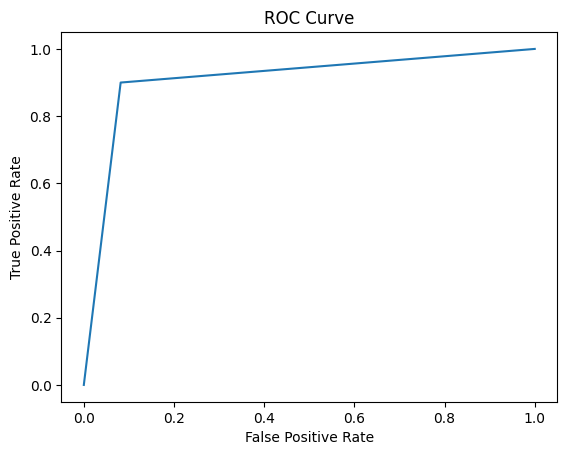

In [33]:
plot_roc_curve(y_test, y_pred)

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_curve(test, predicted):
    precision, recall, thresholds = precision_recall_curve(test, predicted)
    plt.plot(precision, recall)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall Curve')
    plt.show()

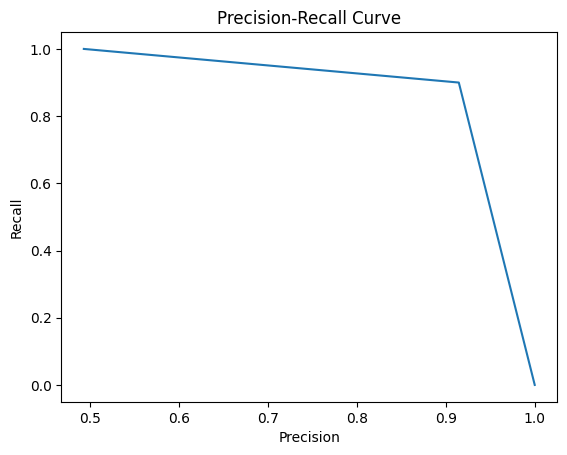

In [37]:
plot_precision_recall_curve(y_test, y_pred)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      1212
         1.0       0.91      0.90      0.91      1179

    accuracy                           0.91      2391
   macro avg       0.91      0.91      0.91      2391
weighted avg       0.91      0.91      0.91      2391



In [39]:
#visualize confusion matrix
from sklearn.metrics import confusion_matrix

#visualize confusion matrix as heatmap
def visualize_confusion_matrix(test, predicted):
    heatmap = sns.heatmap(confusion_matrix(test, predicted), annot=True, fmt='d')
    heatmap.set_xlabel('Predicted')
    heatmap.set_ylabel('True')
    heatmap.set_title('Confusion Matrix')

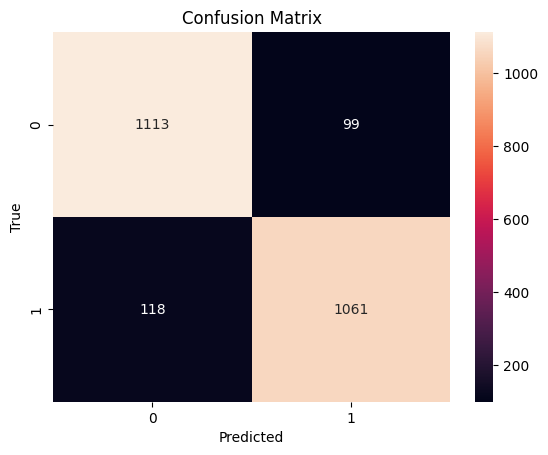

In [40]:
visualize_confusion_matrix(y_test, y_pred)